In [1]:
import pandas as pd

# Define file paths
data_path = "data/adult/adult.data"
test_path = "data/adult/adult.test"
names_path = "data/adult/adult.names"

# Load data (column names inferred from UCI dataset description)
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

# Load datasets
df_train = pd.read_csv(data_path, names=column_names, skipinitialspace=True)
df_test = pd.read_csv(test_path, names=column_names, skipinitialspace=True, skiprows=1)

# Display basic info about the datasets
df_train.info(), df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (tot

/Users/qyu/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


(None, None)

/Users/qyu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/qyu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/qyu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/qyu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

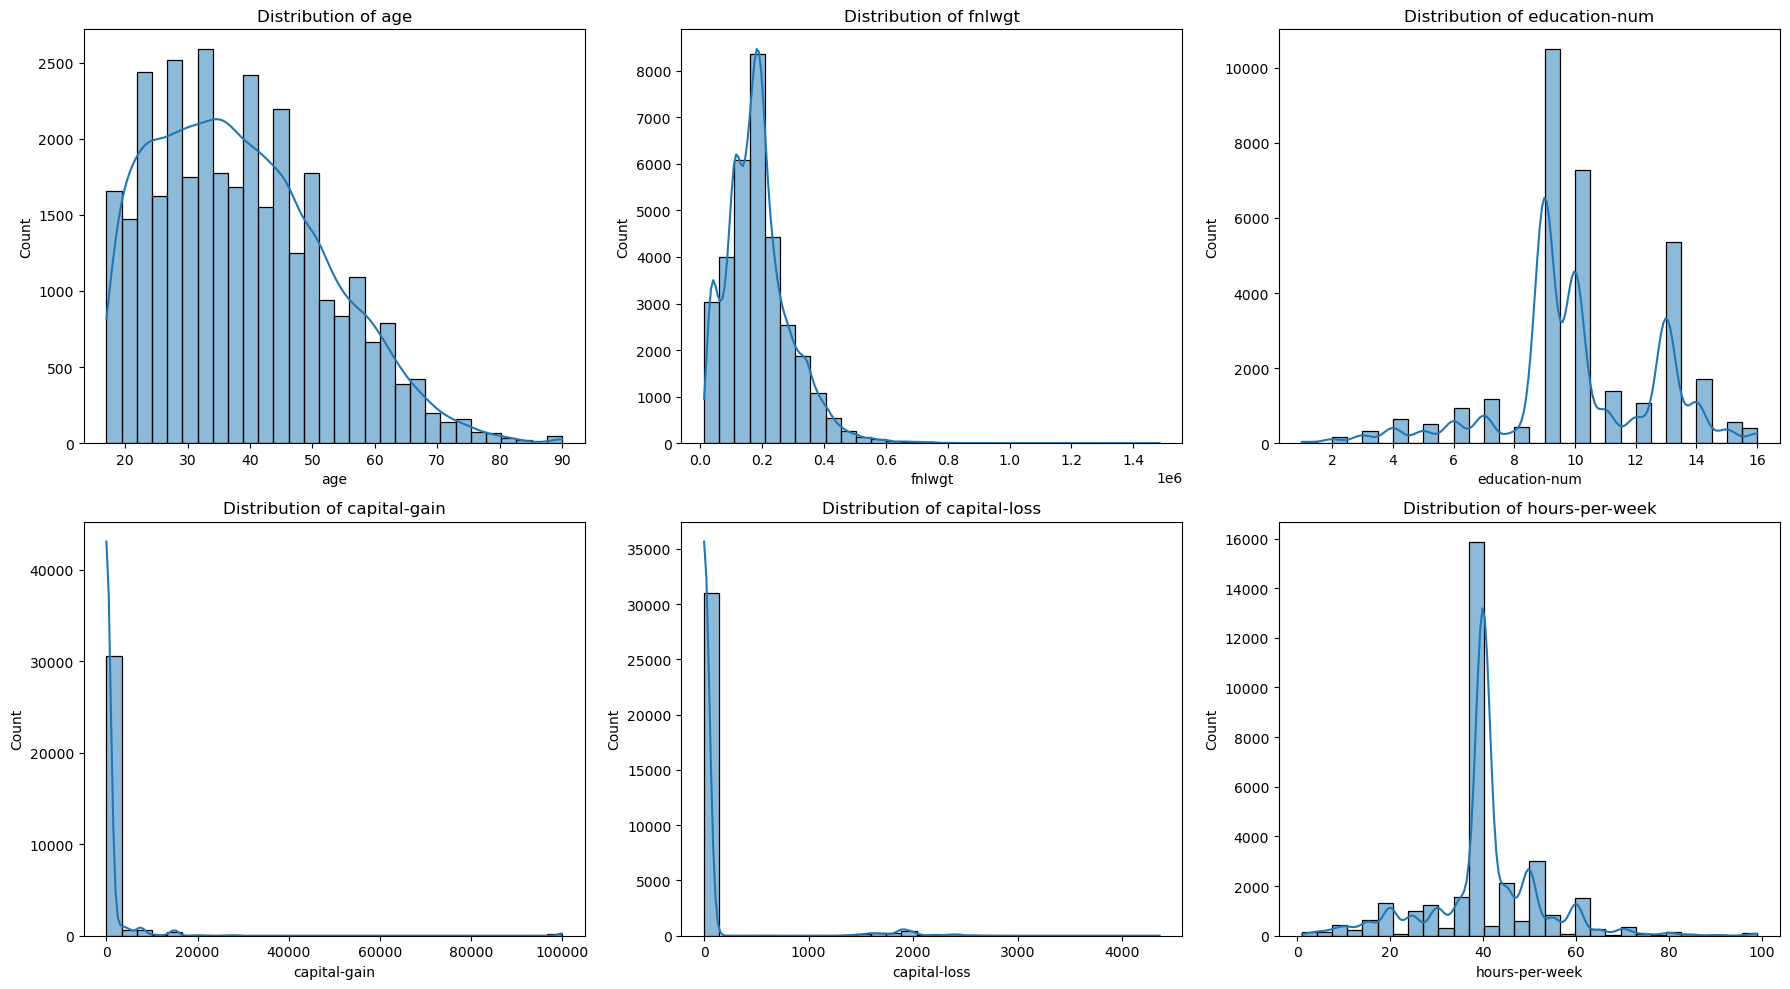

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
summary_stats = df_train.describe()

# Visualizing distributions of numerical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
numerical_cols = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

for col, ax in zip(numerical_cols, axes.flatten()):
    sns.histplot(df_train[col], bins=30, kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# Display summary statistics
summary_stats

In [4]:
import scipy.stats as stats

# ANOVA: Checking if 'education' level has a significant effect on 'income'
df_train['income'] = df_train['income'].str.strip()  # Cleaning whitespace

# Convert income to binary (0 for <=50K, 1 for >50K)
df_train['income_binary'] = df_train['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Grouping by education level
education_groups = [df_train[df_train['education'] == edu]['income_binary'] for edu in df_train['education'].unique()]

# Perform ANOVA test
anova_result = stats.f_oneway(*education_groups)
anova_result


F_onewayResult(statistic=341.64276663112724, pvalue=0.0)

In [5]:
import statsmodels.api as sm

# Selecting relevant features for regression
features = ["age", "education-num", "hours-per-week", "capital-gain", "capital-loss"]
X = df_train[features]
y = df_train["income_binary"]

# Adding a constant term for intercept
X = sm.add_constant(X)

# Fitting logistic regression model
logit_model = sm.Logit(y, X).fit()

# Displaying regression results
logit_summary = logit_model.summary()
logit_summary


Optimization terminated successfully.
         Current function value: 0.406725
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          income_binary   No. Observations:                32561
Model:                          Logit   Df Residuals:                    32555
Method:                           MLE   Df Model:                            5
Date:                Sun, 16 Feb 2025   Pseudo R-squ.:                  0.2632
Time:                        08:10:42   Log-Likelihood:                -13243.
converged:                       True   LL-Null:                       -17974.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -8.3157      0.115    -72.240      0.000      -8.541      -8.090
age                0.0430      0.001     35.211      0.000       0.041       0.045
education-num      0.3228      0.007     47.361      0.000       0.309       0.336
hours-per-week     0.0407      0.001     30.776      0.000       0.038       0.043
capital-gain       0.0003   9.68e-06     32.916      0.000       0.000       0.000
capital-loss       0.0007   3.25e-05     21.480      0.000       0.001       0.001
==================================================================================
"""

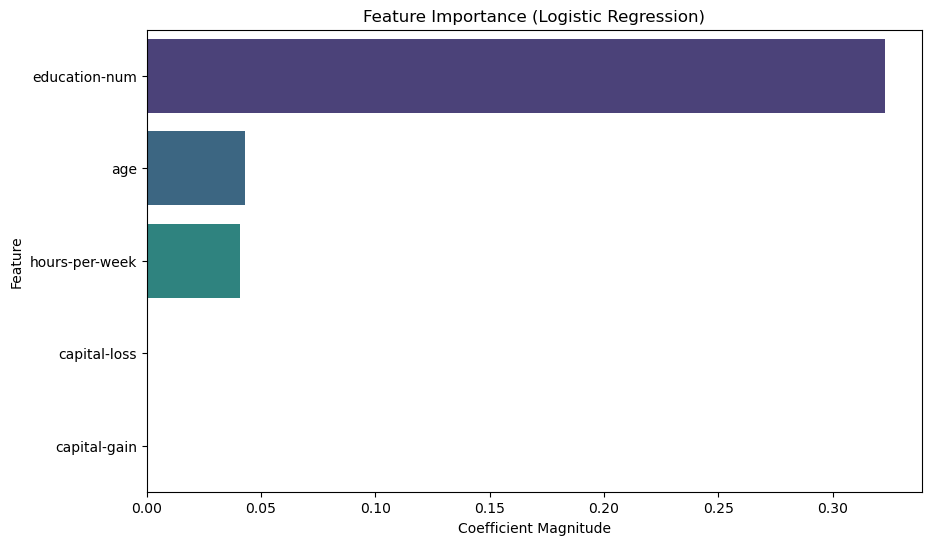

,Feature,Importance
education-num,education-num,0.322750
age,age,0.043019
hours-per-week,hours-per-week,0.040724
capital-loss,capital-loss,0.000699
capital-gain,capital-gain,0.000319


In [7]:
# Extract feature importance from logistic regression model (absolute values of coefficients)
feature_importance = pd.DataFrame({
    "Feature": features,
    "Importance": abs(logit_model.params[1:])  # Excluding intercept
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")
plt.title("Feature Importance (Logistic Regression)")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.show()

# Display feature importance values
feature_importance
